In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sqlite3
import matplotlib.pyplot as plt

# Useful Info For loading Data
https://www.kaggle.com/dimarudov/data-analysis-using-sql

Below we connect to the database

In [2]:

path = "../input/"  #Insert path here
database = path + 'database.sqlite'

conn = sqlite3.connect(database)

We load att the games with home goal, away goal and betting odds for different companies

In [3]:

detailed_bets = pd.read_sql("""SELECT home_team_goal, 
                                        away_team_goal,
                                        B365H,
                                        B365D,
                                        B365A,
                                        BWH,
                                        BWD,
                                        BWA,
                                        IWH,
                                        IWD,
                                        IWA,
                                        LBH,
                                        LBD,
                                        LBA,
                                        PSH,
                                        PSD,
                                        PSA,
                                        WHH,
                                        WHD,
                                        WHA,
                                        SJH,
                                        SJD,
                                        SJA,
                                        VCH,
                                        VCD,
                                        VCA,
                                        GBH,
                                        GBD,
                                        GBA,
                                        BSH,
                                        BSD,
                                        BSA
                                        
                                        
                                FROM Match;""", conn)

detailed_bets.shape

(25979, 32)

We check all the columns and see if there are lots of NaNs, we noticed that certain betting companies have lots of them

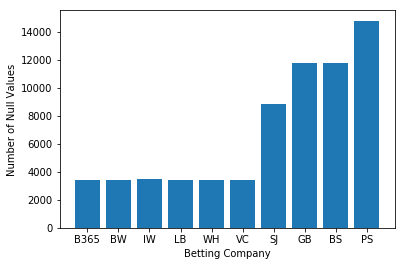

In [87]:
nullValues = detailed_bets.isna().sum()
#plt.plot(nullValues)


index = ['B365', 'BW', 'IW', 'LB', 'WH', 'VC', 'SJ', 'GB', 'BS', 'PS']
array = [3387,  3404, 3459,  3423, 3408,  3411,  8882, 11817, 11818, 14811]
plt.ylabel("Number of Null Values")
plt.xlabel("Betting Company")
plt.bar(index, array)
plt.savefig("im3.png")

We are dropping GB, BS, and PS betting companies because they have lots of nulls

In [5]:
detailed_bets_filtered = pd.read_sql("""SELECT home_team_goal, 
                                        away_team_goal,
                                        B365H,
                                        B365D,
                                        B365A,
                                        BWH,
                                        BWD,
                                        BWA,
                                        IWH,
                                        IWD,
                                        IWA,
                                        LBH,
                                        LBD,
                                        LBA,
                                        WHH,
                                        WHD,
                                        WHA,
                                        SJH,
                                        SJD,
                                        SJA,
                                        VCH,
                                        VCD,
                                        VCA
                                        
                                        
                                FROM Match;""", conn)

We drop all the matches that have lots of naans and get 17 000 games

In [6]:
cleaned_bets = detailed_bets_filtered.dropna(thresh=23) #drops vals if there are more than 1 Nan

cleaned_bets.shape

(16980, 23)

In [7]:
cleaned_bets['result'] = 0
cleaned_bets.loc[detailed_bets['home_team_goal'] < detailed_bets['away_team_goal'], 'result'] = -1
cleaned_bets.loc[detailed_bets['home_team_goal'] > detailed_bets['away_team_goal'], 'result'] = 1
cleaned_bets


C:\Users\jonghae\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\jonghae\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,home_team_goal,away_team_goal,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,...,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,result
0,1,1,1.73,3.40,5.00,1.75,3.35,4.20,1.85,3.20,...,1.70,3.30,4.33,1.90,3.30,4.00,1.65,3.40,4.50,0
1,0,0,1.95,3.20,3.60,1.80,3.30,3.95,1.90,3.20,...,1.83,3.30,3.60,1.95,3.30,3.80,2.00,3.25,3.25,0
2,0,3,2.38,3.30,2.75,2.40,3.30,2.55,2.60,3.10,...,2.50,3.25,2.40,2.63,3.30,2.50,2.35,3.25,2.65,-1
3,5,0,1.44,3.75,7.50,1.40,4.00,6.80,1.40,3.90,...,1.44,3.75,6.00,1.44,4.00,7.50,1.45,3.75,6.50,1
4,1,3,5.00,3.50,1.65,5.00,3.50,1.60,4.00,3.30,...,4.20,3.40,1.70,4.50,3.50,1.73,4.50,3.40,1.65,-1
5,1,1,4.75,3.40,1.67,4.85,3.40,1.65,3.70,3.20,...,4.20,3.40,1.70,5.50,3.75,1.67,4.35,3.40,1.70,0
6,2,2,2.10,3.20,3.30,2.05,3.25,3.15,1.85,3.20,...,1.83,3.30,3.60,1.91,3.40,3.60,2.10,3.25,3.00,0
7,1,2,3.20,3.40,2.20,2.55,3.30,2.40,2.40,3.20,...,2.70,3.25,2.25,2.60,3.40,2.40,2.80,3.25,2.25,-1
8,1,0,2.25,3.25,2.88,2.30,3.25,2.70,2.10,3.10,...,2.20,3.25,2.75,2.20,3.30,3.10,2.25,3.25,2.80,1
9,4,1,1.30,5.25,9.50,1.25,5.00,10.00,1.30,4.20,...,1.35,4.20,7.00,1.27,5.00,10.00,1.30,4.35,8.50,1


In [8]:
bets_percentage = cleaned_bets[cleaned_bets.columns[2:23]] #take all the COLUMNS and take the reciprocal

In [9]:
bp_reciprocal = bets_percentage.rdiv(1)

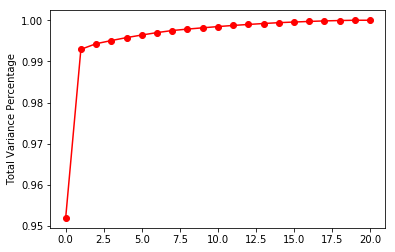

((21, 16980), (0, 16980))

<Figure size 432x288 with 0 Axes>

In [86]:
data = bp_reciprocal.values.T #Convert from Pandas dataframe to Numpy array
data -= np.mean(data,axis=1)[:,np.newaxis] #Calculate the (X-mu) part for the equation of sample covariance matrix 
U, W, _ = np.linalg.svd(data) #Conduct singular value decomposition
S = np.cumsum(W**2/(data[0,:].size-1))#Calculate the cumulative sum at each entry of W (Original bug was here)
R = S / S[-1] #Calculate the cumulative weight of the first ith (i = 1, 2, ..., 15) principle (eigenvalue) to the sum 
              #of all principle (eigenvalue)
plt.plot(R,'ro-') #Plot the cumulative sum of at each principle component (eigenvalue)
plt.ylabel('Total Variance Percentage')
plt.savefig("im2.png")
plt.show()
plt.savefig("im2.png")
n = (R<0.9).sum() #The best approximation is taking the largest n PCs (eigenvalue) that cumulatively capture 
                  #around 90% of the total PCs (eigenvalue), so find that n
A = U[:,:n].T.dot(data) #Rotate the data and reduces the dimensionality from 15 to 4 while preserving the most variance possible
data.shape, A.shape #Compare the dimension of the raw data to the reduced data

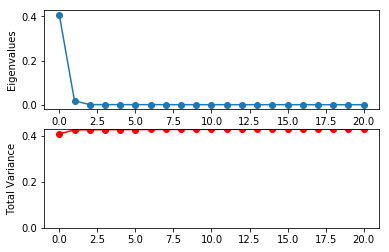

In [41]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=data.shape[0], whiten=False)
B = pca.fit_transform(data.T).T
E, L = pca.components_.T, pca.explained_variance_

plt.subplot(111,aspect='equal')
plt.plot(B[0,:],B[3,:], '.', alpha=0.2);
plt.subplot(211); plt.plot(L,'o-'); plt.ylabel('Eigenvalues');
plt.subplot(212); cl=np.cumsum(L); plt.ylabel('Total Variance');
plt.plot(cl,'o-r'); plt.ylim(0,None);
#plt.plot(cl/cl[-1],'o-r'); plt.ylim(0,None);    #Normalizes to 1 (y-axis changes)